In [1]:
import os               
import numpy as np      
import pandas as pd     
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob

In [2]:
# read in all result excels containing the corr. eff.
path1 = '../../Notebooks/CML/results/Emissions_IC/result_CorrCoeff'
files1 = glob.glob(os.path.join(path1, "*.xlsx"))
path2 = '../../Notebooks/CML/results/Resources_IC'
files2 = glob.glob(os.path.join(path2, "*.xlsx"))

In [3]:
htmap_9emis = pd.DataFrame()
for f in files1:
    f_name = f.split("/")[-1]
    ICname = f_name.split("_pairwise_comp")[0]
    #print(ICname)
    df = pd.read_excel(f, index_col = 0)  # need to read-in row index
    ic = df.loc[:, ['result_CorrCoeff']]
    ic = ic.rename(columns={"result_CorrCoeff": ICname})
    ict = ic.T
    htmap_9emis = htmap_9emis.append(ict)

In [4]:
htmap_9emis

,SPvsCML,SPvsBW2,SPvsopenLCA,openLCAvsBW2,openLCAvsCML,BW2vsCML
CML_Photochemical oxidation,0.999993,1.000000,1.000000,0.999947,0.999995,1.000000
CML_Marine aquatic ecotoxicity,0.999999,0.998513,1.000000,0.999406,0.999998,0.998677
CML_Freshwater aquatic toxicity,0.999999,0.998803,0.999885,0.998738,0.999930,0.999047
CML_Ozone layer depletion,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CML_Eutrophication,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CML_Acidification,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CML_Terrestrial ecotoxicity,0.999999,0.999307,0.998217,0.984662,0.998190,0.999368
CML_Global warming,1.000000,0.997537,1.000000,0.998147,1.000000,0.997537
CML_Human toxicity,0.999999,0.998809,1.000000,0.999007,0.999999,0.998606


In [5]:
htmap_2res = pd.DataFrame()

for f in files2:
    res_f = pd.ExcelFile(f)
    f_name = f.split("/")[-1]
    ICname = f_name.split("_pairwise_comp")[0]
    # add in new list for each IC, as it has multiple sheets:
    ind_nm = []
    corr = []
    for ff in res_f.sheet_names:
        # for corr. eff, it's saved to row7/8, skip first 4 rows are summary table
        df = pd.read_excel(f, sheet_name = ff, skiprows=[0,1,2,3,4], nrows = 2 )
        ind_nm.append(ff)  #sheetname will be used as index_name 
        corr.append( df.iat[1,1] )  # corr. eff. for each pair-wise
        
    d = {'value':corr}
    ic = pd.DataFrame(d, index=ind_nm)
    ic = ic.rename(columns={"value": ICname})
    ict = ic.T
    htmap_2res = htmap_2res.append(ict)

In [6]:
htmap_2res

,SPvsCML,SPvsopenLCA,openLCAvsCML,SPvsBW2,openLCAvsBW2,BW2vsCML
CML_Abiotic depletion (fossil),NaN,1.0,NaN,NaN,NaN,NaN
CML_Abiotic depletion (element),NaN,1.0,NaN,NaN,0.996334,NaN


In [7]:
allhtmap = htmap_9emis.copy()

In [8]:
allhtmap = allhtmap.append(htmap_2res)

In [9]:
allhtmap

,SPvsCML,SPvsBW2,SPvsopenLCA,openLCAvsBW2,openLCAvsCML,BW2vsCML
CML_Photochemical oxidation,0.999993,1.000000,1.000000,0.999947,0.999995,1.000000
CML_Marine aquatic ecotoxicity,0.999999,0.998513,1.000000,0.999406,0.999998,0.998677
CML_Freshwater aquatic toxicity,0.999999,0.998803,0.999885,0.998738,0.999930,0.999047
CML_Ozone layer depletion,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CML_Eutrophication,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CML_Acidification,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CML_Terrestrial ecotoxicity,0.999999,0.999307,0.998217,0.984662,0.998190,0.999368
CML_Global warming,1.000000,0.997537,1.000000,0.998147,1.000000,0.997537
CML_Human toxicity,0.999999,0.998809,1.000000,0.999007,0.999999,0.998606
CML_Abiotic depletion (fossil),NaN,NaN,1.000000,NaN,NaN,NaN


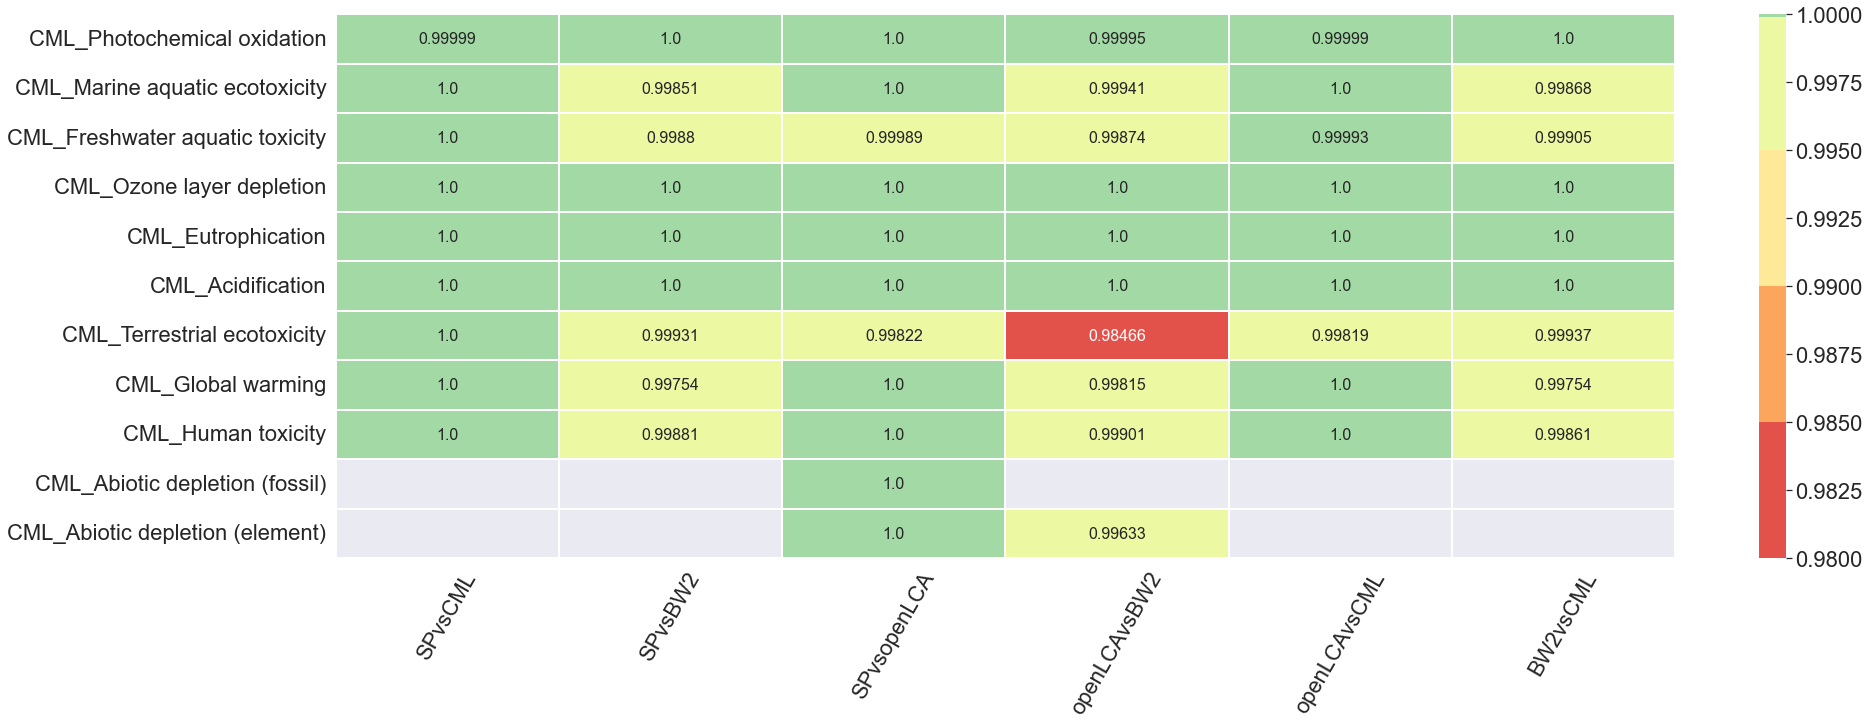

In [12]:
#https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
fig, ax = plt.subplots(figsize=(30,10))         # Sample figsize in inches
cmap = sns.color_palette("Spectral")  #("")  gist_ncar

sns.set_context("poster")
sns.set(font_scale=2)
plot = sns.heatmap(
    allhtmap,         
    vmin=0.98, 
    vmax=1,
    annot=True, 
    fmt=".5",
    linewidths=.05, 
    ax=ax,
    cmap=cmap,
    center=0.995,                 
    annot_kws={"size":16},
    yticklabels=allhtmap.index.values   
)
plt.yticks(rotation=0) 
plt.xticks(rotation=60)

plt.savefig('CML_heatmap.pdf', pad_inches = 0.2, bbox_inches = 'tight',orientation = 'landscape' )  
